In [ ]:
import numpy as np

# setting the seed allows for reproducible results
np.random.seed(123)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt
import math
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [ ]:
import cvxopt
from cvxopt import matrix, solvers

In [ ]:
class Model:
    def __init__(self):
        self.data = None
        self.model = None
        self.final_ratio = None
        self.cov = None
        self.exp_return = None

    def sharpe_loss(self, y_true, y_pred):

        a = self.exp_return.reshape(1, -1) @ y_pred.reshape(-1, 1)
        b = self.cov @ y_pred.reshape(-1, 1)
        c = y_pred.reshape(1, -1) @ b.reshape(-1, 1)
        d = tf.math.sqrt(c)

        sharpe = a / d
        return -sharpe

    def __build_model(self, input_shape, outputs, l_rate):

        model = Sequential([
            LSTM(64, input_shape=input_shape),
            Flatten(),
            Dense(outputs, activation='softmax')
        ])

        Opt = Adam(learning_rate = l_rate)
        model.compile(loss=self.sharpe_loss, optimizer=Opt)
        return model

    def get_allocations(self, data: pd.DataFrame, lr=0.001, ep=20):

        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)

        temparr = data.to_numpy()
        return_rate = (temparr[:-1] - temparr[1:])/temparr[1:]
        exp_return = np.mean(return_rate,axis=0)
        cov = np.transpose(return_rate) @ return_rate
        cov = cov/(len(data.index)-1)

        data = data.iloc[1:]

        self.data = tf.cast(tf.constant(data), float)
        self.exp_return = tf.convert_to_tensor(exp_return, tf.float32)
        self.cov = tf.convert_to_tensor(cov, tf.float32)

        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns), l_rate = lr)

        fit_predict_data = data_w_ret[np.newaxis,:]
        history = self.model.fit(fit_predict_data, np.zeros((1, len(data.columns))), epochs=ep, shuffle=False)
        self.final_ratio = -history.history['loss'][-1]
        return self.model.predict(fit_predict_data)[0]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OMF_data_final/uploaded_data_2/Dataset_2_csv.csv')
df = df[df.columns[1:]]

In [ ]:
window = 30
num_days = len(df.index)
num_companies = df.columns.size
total_rows = num_days - window + 1

10 Epochs

In [ ]:
num_epochs = 10 # Change it to number of epochs needed
T = []
learning_rates = []

In [ ]:
model_return = []
model_risk = []
mkw_return = []
mkw_risk = []

In [ ]:
lr = 0.1 # Put the learning rate required

In [ ]:
for itr in range(total_rows):
  tempdf = df.iloc[itr:itr+window]
  temparr = tempdf.to_numpy()
  return_rate = (temparr[:-1] - temparr[1:])/temparr[1:]
  exp_return = np.mean(return_rate,axis=0)
  temp_cov = np.transpose(return_rate) @ return_rate
  temp_cov = temp_cov/(window-1)

  m = Model()
  w = m.get_allocations(tempdf,lr,num_epochs)
  model_return.append(np.dot(w,exp_return))
  temp_model_risk = np.transpose(w) @ temp_cov @ w
  temp_model_risk = math.sqrt(temp_model_risk)
  model_risk.append(temp_model_risk)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.0168
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: -0.2412
Epoch 3/10
1/1 [==============================] - 0s 36ms/step - loss: -0.4395
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: -0.5344
Epoch 5/10
1/1 [==============================] - 0s 38ms/step - loss: -0.5512
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: -0.5481
Epoch 7/10
1/1 [==============================] - 0s 34ms/step - loss: -0.5486
Epoch 8/10
1/1 [==============================] - 0s 44ms/step - loss: -0.5503
Epoch 9/10
1/1 [==============================] - 0s 38ms/step - loss: -0.5511
Epoch 10/10
1/1 [==============================] - 1s 1s/step
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: -0.1122
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: -0.3348
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: -0.

1/1 [==============================] - 0s 366ms/step
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0913
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: -0.2346
Epoch 3/10
1/1 [==============================] - 0s 19ms/step - loss: -0.3958
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: -0.4899
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: -0.5216
Epoch 6/10
1/1 [==============================] - 0s 18ms/step - loss: -0.5306
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: -0.5263
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: -0.5443
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: -0.5509
Epoch 10/10
1/1 [==============================] - 0s 14ms/step - loss: -0.5536


1/1 [==============================] - 0s 391ms/step
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0050
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: -0.2938
Epoch 3/10
1/1 [==============================] - 0s 19ms/step - loss: -0.4529
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: -0.5405
Epoch 5/10
1/1 [==============================] - 0s 20ms/step - loss: -0.5630
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: -0.5666
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: -0.5655
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: -0.5676
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: -0.5767
Epoch 10/10
1/1 [==============================] - 0s 374ms/step
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: -0.0437
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: -0.3211
Epoch 3/10
1/1 [==

In [ ]:
for itr in range(total_rows):
  tempdf = df.iloc[itr:itr+window]
  temparr = tempdf.to_numpy()
  return_rate = (temparr[:-1] - temparr[1:])/temparr[1:]
  exp_return = np.mean(return_rate,axis=0)
  temp_cov = np.transpose(return_rate) @ return_rate
  temp_cov = temp_cov/(window-1)

  e = np.ones(num_companies)

  R = model_return[itr]

  P = matrix(2*temp_cov)
  q = matrix(np.zeros(num_companies))

  A = matrix(np.array([e, exp_return]))
  b = matrix(np.array([1,R]))

  G = matrix(-np.eye(num_companies))
  h = matrix(np.zeros(num_companies))
  sol = solvers.qp(P, q, G=G, h=h, A=A, b=b)

  wmw = np.array(sol['x'])
  mkw_return.append(R)
  mkw_risk.append(math.sqrt(sol['primal objective']))

     pcost       dcost       gap    pres   dres
 0:  9.0460e-05 -1.0232e+00  6e+01  8e+00  8e+00
 1:  8.9013e-05 -8.2059e-01  4e+00  4e-01  4e-01
 2:  9.2051e-05 -2.0417e-01  8e-01  8e-02  9e-02
 3:  1.9685e-04 -1.5658e-01  2e-01  3e-15  2e-15
 4:  1.9663e-04 -2.8867e-03  3e-03  5e-15  2e-15
 5:  1.7868e-04 -1.1700e-03  1e-03  8e-15  6e-16
 6:  1.2624e-04 -6.1176e-04  7e-04  7e-16  1e-17
 7:  1.2232e-04 -4.7239e-06  1e-04  1e-15  7e-18
 8:  8.4669e-05 -3.2797e-05  1e-04  1e-16  2e-18
 9:  8.4167e-05  6.3561e-05  2e-05  8e-16  1e-18
10:  8.2326e-05  5.8070e-05  2e-05  4e-16  4e-19
11:  8.0124e-05  7.6098e-05  4e-06  1e-16  6e-19
12:  7.9842e-05  7.5702e-05  4e-06  2e-16  5e-19
13:  7.8893e-05  7.8305e-05  6e-07  4e-17  3e-19
14:  7.8624e-05  7.8614e-05  1e-08  1e-16  2e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.9176e-05 -1.0303e+00  6e+01  7e+00  8e+00
 1:  6.7954e-05 -8.7746e-01  3e+00  3e-01  3e-01
 2:  6.6570e-05 -3.1322e-01  1e+00  9e-02  1e-0

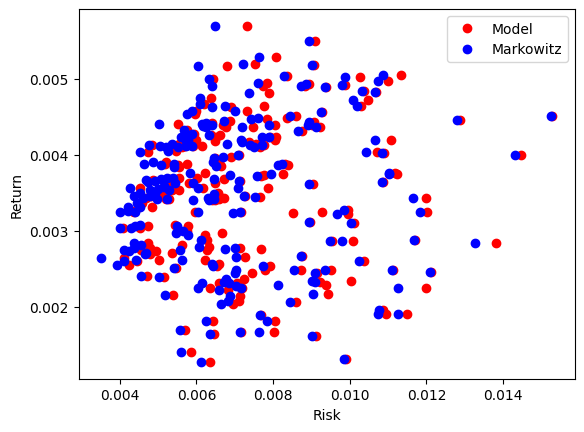

In [ ]:
plt.plot(model_risk,model_return,'o',color='r',label='Model')
plt.plot(mkw_risk, mkw_return,'o',color='b',label='Markowitz')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()

In [ ]:
tsum = 0
for i in range(len(model_return)):
  tval = (model_risk[i] - mkw_risk[i])/abs(model_return[i])
  tsum += tval

tsum /= len(model_return)
# tsum stores the value of the learning rate's comparision parameter
T.append(tsum)
learning_rates.append(lr)

In [ ]:
T

[0.09931545233072141]

In [ ]:
learning_rates

[0.1]